Imports

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Dataset

In [27]:
X_np, y_np = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

In [28]:
y = y.reshape(y.shape[0],-1)
m,n_features = X.shape
m,n_features

(1000, 1)

Model

In [29]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

Loss and optimiser

In [30]:
loss_criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = .1)

Training loop

In [31]:
n_iterations = 100

for epoch in range(n_iterations):
    y_hat = model(X)
    loss= loss_criterion(y_hat, y)
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()
    
    if epoch%10 == 0:
        [w,b] = model.parameters()
        print(f"Epoch: {epoch+1}  loss:{loss}  weight:{w[0].item()}")

Epoch: 1  loss:1856.344970703125  weight:6.922159671783447
Epoch: 11  loss:421.7513122558594  weight:34.56298828125
Epoch: 21  loss:401.875  weight:37.818359375
Epoch: 31  loss:401.59051513671875  weight:38.2050666809082
Epoch: 41  loss:401.5863037109375  weight:38.25136184692383
Epoch: 51  loss:401.58624267578125  weight:38.256935119628906
Epoch: 61  loss:401.5862121582031  weight:38.25761413574219
Epoch: 71  loss:401.5862121582031  weight:38.25769805908203
Epoch: 81  loss:401.5862121582031  weight:38.2577018737793
Epoch: 91  loss:401.5862121582031  weight:38.2577018737793


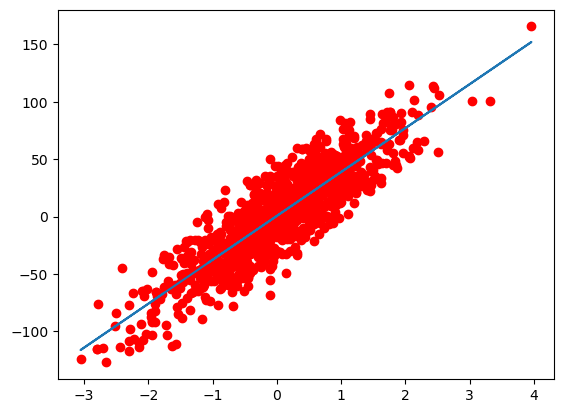

In [32]:
plt.plot(X,y,'ro')
plt.plot(X,model(X).detach().numpy())
plt.show()

In [33]:
X_test = torch.tensor([0.1], dtype = torch.float32)
print(model(X_test).item())

4.406770706176758
